** "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work"**

In [1]:
import json

 
with open('movie.json', 'r') as f:
    line = f.readline() # read only the first tweet/line
    tweet = json.loads(line) # load it as Python dictionary
    print(json.dumps(tweet, indent=4)) 
    
# the original data from Twitter looks like below.

{
    "quote_count": 0, 
    "contributors": null, 
    "truncated": false, 
    "text": "Balade Runner est un film long, difficile \u00e0 suivre parfois mais tellement fascinant. H\u00e2te de voir #BladeRunner2049 !", 
    "is_quote_status": false, 
    "in_reply_to_status_id": null, 
    "reply_count": 0, 
    "id": 918953409394470912, 
    "favorite_count": 0, 
    "source": "<a href=\"http://twitter.com/download/android\" rel=\"nofollow\">Twitter for Android</a>", 
    "retweeted": false, 
    "coordinates": null, 
    "timestamp_ms": "1507930540785", 
    "entities": {
        "user_mentions": [], 
        "symbols": [], 
        "hashtags": [
            {
                "indices": [
                    98, 
                    114
                ], 
                "text": "BladeRunner2049"
            }
        ], 
        "urls": []
    }, 
    "in_reply_to_screen_name": null, 
    "id_str": "918953409394470912", 
    "retweet_count": 0, 
    "in_reply_to_user_id": null, 
  

In [2]:
import json

# create an empty list to store our tweets in
data = []

# append each line of the data to our tweets list using the json module
for line in open('movie.json'):
    try:
        data.append(json.loads(line))
    except:
        pass

# lets see how many we got
print len(data)

81305


In [3]:
# read first five tweets only 
for i in data[:5]:
    print i['text']

Balade Runner est un film long, difficile à suivre parfois mais tellement fascinant. Hâte de voir #BladeRunner2049 !
#BladeRunner2049 just reminded me what cinema is capable of. Phenomenal.
Film of the year (pre-Star Wars, of course).
RT @ecartelera: #Kingsman #ElCírculoDeOro no se podrá ver en Camboya porque ha sido CENSURADA https://t.co/qvDMlE8AKt https://t.co/dtwPFeSY…
And this is why I absolutely adore @kelly_clarkson and @GalGadot! ❤️ https://t.co/HySMmntd4r
RT @JoRoan: “If Asians shaped this cyberpunk future, where are they?”
@shashashasha @eeeeenid @xuhulk @tealtan https://t.co/3KsuUfiOYa


In [4]:
# Read Sales dataset
import pandas as pd
df2 = pd.read_csv('movie_sales.csv')
df2.head()

/home/ubuntu/anaconda2/lib/python2.7/site-packages/numexpr/cpuinfo.py:42: UserWarning: [Errno 12] Cannot allocate memory
  warnings.warn(str(e), UserWarning, stacklevel=stacklevel)


,Movie,hashtags,Sales
0,Blade Runner 2049,BladeRunner2049,7353151
1,American Made,AmericanMade,3131650
2,Kingsman: The Golden Circle,Kingsman,3011307
3,The Mountain Between Us,TheMountainBetweenUs,2773757
4,Victoria and Abdul,VictoriaAndAbdul,2126115


In [5]:
df2['hashtags'] = df2.hashtags.str.lower() 

In [6]:
df2.head()

,Movie,hashtags,Sales
0,Blade Runner 2049,bladerunner2049,7353151
1,American Made,americanmade,3131650
2,Kingsman: The Golden Circle,kingsman,3011307
3,The Mountain Between Us,themountainbetweenus,2773757
4,Victoria and Abdul,victoriaandabdul,2126115


In [7]:
# savin the entire tweets (not other data) in a variable and print it

texts = [ T['text'] for T in data if 'text' in T ]
len(texts)

81297

In [8]:
for T in data:
    if 'text' not in T:
        print T    

{u'limit': {u'track': 25, u'timestamp_ms': u'1508177709881'}}
{u'limit': {u'track': 34, u'timestamp_ms': u'1508177714262'}}
{u'limit': {u'track': 15, u'timestamp_ms': u'1508177721703'}}
{u'limit': {u'track': 15, u'timestamp_ms': u'1508177723835'}}
{u'limit': {u'track': 25, u'timestamp_ms': u'1508224526877'}}
{u'limit': {u'track': 35, u'timestamp_ms': u'1508224529105'}}
{u'limit': {u'track': 23, u'timestamp_ms': u'1508224552924'}}
{u'limit': {u'track': 36, u'timestamp_ms': u'1508224597911'}}


In [9]:
# removing those error messages
tweets = []
for T in data:
    if 'text' in T:
        tweets.append(T)
len(tweets)       


81297

- The original tweets are 81297 data

In [10]:
# only English tweets & meta data
english_tweets = []
for i in tweets:
    if i['user']['lang'] == "en":
        english_tweets.append(i)
len(english_tweets)

51678

- The english tweets are 51678

In [11]:
# Collecting all the data I want to analyze as variables
ids = [T['id_str'] for T in english_tweets]
times = [T['created_at'] for T in english_tweets]
screen_names = [T['user']['screen_name'] for T in english_tweets]
len(screen_names)
retweet_count = [T['retweet_count'] for T in english_tweets]
favorites_count = [T['user']['favourites_count'] for T in english_tweets]
place_names = [(T['place']['full_name'] if T['place'] else None) for T in english_tweets]
place_types = [(T['place']['place_type'] if T['place'] else None) for T in english_tweets]
followers_count = [status['user']['followers_count'] for status in english_tweets if 'user' in status]
friends_count = [status['user']['friends_count'] for status in english_tweets if 'user' in status]
texts = [ T['text'] for T in english_tweets if 'text' in T ]
len(texts)

51678

In [12]:
# import popular packages
import csv
import pandas as pd

In [13]:
# open an output csv file to write to save all data
tweet_data = []

# merge each individual list into a single list using the zip function
rows = zip(ids,times, texts, screen_names, followers_count, friends_count, favorites_count)

# use one value from each of our rows list and write it to the csv as a new row
for row in rows:
    values = [(value.encode('utf8') if hasattr(value, 'encode') else value) for value in row]
    tweet_data.append(values)
tweet_data = pd.DataFrame(tweet_data) 
tweet_data.to_csv("tweet_data.csv")
tweet_data.head()



,0,1,2,3,4,5,6
0,918953414289231874,Fri Oct 13 21:35:41 +0000 2017,#BladeRunner2049 just reminded me what cinema ...,charliehall300,184,391,39
1,918953425332854784,Fri Oct 13 21:35:44 +0000 2017,And this is why I absolutely adore @kelly_clar...,dmcaputo,510,1066,6710
2,918953451991814144,Fri Oct 13 21:35:50 +0000 2017,RT @JoRoan: “If Asians shaped this cyberpunk f...,shashashasha,5538,1453,19898
3,918953475492347904,Fri Oct 13 21:35:56 +0000 2017,RT @annabellemovie: Evil is working overtime t...,VinceRemoTwit,180,191,505
4,918953486007619584,Fri Oct 13 21:35:59 +0000 2017,RT @Kanerudo66: 'I want to show them all what ...,LIONPON3,246,228,9191


In [14]:
# Rename the header
tweet_data = tweet_data.rename(columns={0: 'id', 1: 'time', 2: 'texts', 3: 'Author_screen_name', 4: 'follower_count', 5: 'friends_count', 6: 'favorites_count'})

In [15]:
tweet_data.head()

,id,time,texts,Author_screen_name,follower_count,friends_count,favorites_count
0,918953414289231874,Fri Oct 13 21:35:41 +0000 2017,#BladeRunner2049 just reminded me what cinema ...,charliehall300,184,391,39
1,918953425332854784,Fri Oct 13 21:35:44 +0000 2017,And this is why I absolutely adore @kelly_clar...,dmcaputo,510,1066,6710
2,918953451991814144,Fri Oct 13 21:35:50 +0000 2017,RT @JoRoan: “If Asians shaped this cyberpunk f...,shashashasha,5538,1453,19898
3,918953475492347904,Fri Oct 13 21:35:56 +0000 2017,RT @annabellemovie: Evil is working overtime t...,VinceRemoTwit,180,191,505
4,918953486007619584,Fri Oct 13 21:35:59 +0000 2017,RT @Kanerudo66: 'I want to show them all what ...,LIONPON3,246,228,9191


In [16]:
tweet_data['texts'] = tweet_data.texts.str.lower() 

In [17]:
tweet_data['hashtags'] = tweet_data.texts.str.findall(r"(?<=#)\w+") 
tweet_data['retweet'] = tweet_data.texts.str.startswith("rt") 
tweet_data.head()

,id,time,texts,Author_screen_name,follower_count,friends_count,favorites_count,hashtags,retweet
0,918953414289231874,Fri Oct 13 21:35:41 +0000 2017,#bladerunner2049 just reminded me what cinema ...,charliehall300,184,391,39,[bladerunner2049],False
1,918953425332854784,Fri Oct 13 21:35:44 +0000 2017,and this is why i absolutely adore @kelly_clar...,dmcaputo,510,1066,6710,[],False
2,918953451991814144,Fri Oct 13 21:35:50 +0000 2017,rt @joroan: “if asians shaped this cyberpunk f...,shashashasha,5538,1453,19898,[],True
3,918953475492347904,Fri Oct 13 21:35:56 +0000 2017,rt @annabellemovie: evil is working overtime t...,VinceRemoTwit,180,191,505,"[fridaythe13th, annabellecreation]",True
4,918953486007619584,Fri Oct 13 21:35:59 +0000 2017,rt @kanerudo66: 'i want to show them all what ...,LIONPON3,246,228,9191,"[mlpfim, mlpmovie, mylittleponymovie, tempests...",True


In [18]:
tweet_data = pd.DataFrame({ 'screen_name': tweet_data['Author_screen_name'].repeat(tweet_data['hashtags'].str.len()), 'f_count': tweet_data['follower_count'].repeat(tweet_data['hashtags'].str.len()), 'fav_count': tweet_data['favorites_count'].repeat(tweet_data['hashtags'].str.len()), 'friends_count': tweet_data['friends_count'].repeat(tweet_data['hashtags'].str.len()), 'retweet': tweet_data['retweet'].repeat(tweet_data['hashtags'].str.len()), 'text': tweet_data['texts'].repeat(tweet_data['hashtags'].str.len()), 'hashtags': tweet_data['hashtags'].sum() }) 

In [19]:
tweet_data.head()

,f_count,fav_count,friends_count,hashtags,retweet,screen_name,text
0,184,39,391,bladerunner2049,False,charliehall300,#bladerunner2049 just reminded me what cinema ...
3,180,505,191,fridaythe13th,True,VinceRemoTwit,rt @annabellemovie: evil is working overtime t...
3,180,505,191,annabellecreation,True,VinceRemoTwit,rt @annabellemovie: evil is working overtime t...
4,246,9191,228,mlpfim,True,LIONPON3,rt @kanerudo66: 'i want to show them all what ...
4,246,9191,228,mlpmovie,True,LIONPON3,rt @kanerudo66: 'i want to show them all what ...


In [20]:
import numpy as np
tweet_data['originaltweet_count'] = np.where(tweet_data['retweet'] == True, '0', '1')
tweet_data['retweet_count'] = np.where(tweet_data['retweet'] == True, '1', '0')
tweet_data['originaltweet_count'] = tweet_data['originaltweet_count'].astype(int)
tweet_data['retweet_count'] = tweet_data['retweet_count'].astype(int)

In [21]:
tweet_data.head()

,f_count,fav_count,friends_count,hashtags,retweet,screen_name,text,originaltweet_count,retweet_count
0,184,39,391,bladerunner2049,False,charliehall300,#bladerunner2049 just reminded me what cinema ...,1,0
3,180,505,191,fridaythe13th,True,VinceRemoTwit,rt @annabellemovie: evil is working overtime t...,0,1
3,180,505,191,annabellecreation,True,VinceRemoTwit,rt @annabellemovie: evil is working overtime t...,0,1
4,246,9191,228,mlpfim,True,LIONPON3,rt @kanerudo66: 'i want to show them all what ...,0,1
4,246,9191,228,mlpmovie,True,LIONPON3,rt @kanerudo66: 'i want to show them all what ...,0,1


In [22]:
# Drop all the data that hashtages are not our movie hashtags
common = tweet_data.merge(df2,on=['hashtags'])
len(common)

44075

- Final dataset has 25168 data

In [23]:
tweet_data = common
tweet_data.head()

,f_count,fav_count,friends_count,hashtags,retweet,screen_name,text,originaltweet_count,retweet_count,Movie,Sales
0,184,39,391,bladerunner2049,False,charliehall300,#bladerunner2049 just reminded me what cinema ...,1,0,Blade Runner 2049,7353151
1,16,191,44,bladerunner2049,True,EMMAnimation,rt @thisisbenoliver: blade runner 2049 alterna...,0,1,Blade Runner 2049,7353151
2,3305,10301,3093,bladerunner2049,False,istodius,"the longest 2.5 hours of my life...and, the mo...",1,0,Blade Runner 2049,7353151
3,86060,223268,38706,bladerunner2049,False,coachforward,“i always told you. you're special. your histo...,1,0,Blade Runner 2049,7353151
4,234,10656,244,bladerunner2049,False,DoomBoxPro,"so... #bladerunner2049. really good movie, def...",1,0,Blade Runner 2049,7353151


In [24]:
import pandas as pd
# number of hashtags in data
len(pd.unique(tweet_data.hashtags.ravel()))

25

- Number of hashtages in my dataset is 4981

In [27]:
import pandas as pd
# number of tweets
len(pd.unique(tweet_data.text.ravel()))

18952

In [28]:
tweet_data.head()

,f_count,fav_count,friends_count,hashtags,retweet,screen_name,text,originaltweet_count,retweet_count,Movie,Sales
0,184,39,391,bladerunner2049,False,charliehall300,#bladerunner2049 just reminded me what cinema ...,1,0,Blade Runner 2049,7353151
1,16,191,44,bladerunner2049,True,EMMAnimation,rt @thisisbenoliver: blade runner 2049 alterna...,0,1,Blade Runner 2049,7353151
2,3305,10301,3093,bladerunner2049,False,istodius,"the longest 2.5 hours of my life...and, the mo...",1,0,Blade Runner 2049,7353151
3,86060,223268,38706,bladerunner2049,False,coachforward,“i always told you. you're special. your histo...,1,0,Blade Runner 2049,7353151
4,234,10656,244,bladerunner2049,False,DoomBoxPro,"so... #bladerunner2049. really good movie, def...",1,0,Blade Runner 2049,7353151


In [29]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44075 entries, 0 to 44074
Data columns (total 11 columns):
f_count                44075 non-null int64
fav_count              44075 non-null int64
friends_count          44075 non-null int64
hashtags               44075 non-null object
retweet                44075 non-null bool
screen_name            44075 non-null object
text                   44075 non-null object
originaltweet_count    44075 non-null int64
retweet_count          44075 non-null int64
Movie                  44075 non-null object
Sales                  44075 non-null int64
dtypes: bool(1), int64(6), object(4)
memory usage: 3.7+ MB


In [30]:
# create new dataset, list the numbers as column
def f(x):
     return pd.Series(dict(hashtags=x['hashtags'].min(),
                        Number_of_tweets = x['text'].count(), 
                        number_of_follower= x['f_count'].sum(),
                        number_of_friends= x['friends_count'].sum(),
                        Number_of_user = x['screen_name', 'hashtags'].nunique(),
                        Number_of_originaltweet = x['originaltweet_count'].sum(),
                        Number_of_retweet = x['retweet_count'].sum(),
                        Number_of_favorites_count = x['fav_count'].sum(),
                        Number_of_sales = x['Sales'].min(),
                        Movie = x['Movie'].min()
                        ))

In [31]:
df = tweet_data.groupby('hashtags').apply(f) 
print len(df)
df

25


,Movie,Number_of_favorites_count,Number_of_originaltweet,Number_of_retweet,Number_of_sales,Number_of_tweets,Number_of_user,hashtags,number_of_follower,number_of_friends
hashtags,,,,,,,,,,
americanassassin,American Assassin,10000465,112,370,163292,482,482,americanassassin,578321,428152
americanmade,American Made,10051775,438,307,3131650,745,745,americanmade,6710528,1670860
annabellecreation,Annabelle: Creation,3670363,188,159,61253,347,347,annabellecreation,872529,604789
aquestionoffaith,A Question of Faith,1303444,27,72,37190,99,99,aquestionoffaith,363212,155932
betterwatchout,Better Watch Out,1338252,88,62,1825,150,150,betterwatchout,1167872,1010441
bladerunner2049,Blade Runner 2049,289679937,7392,15256,7353151,22648,22648,bladerunner2049,172673430,29099976
bradsstatus,Brad�s Status,123470,18,1,6410,19,19,bradsstatus,27912,10441
despicableme3,Despicable Me 3,2014051,240,108,194730,348,348,despicableme3,24534521,393732
dunkirk,Dunkirk,31511539,151,1328,100121,1479,1479,dunkirk,3574369,1785272


In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, americanassassin to wonderwoman
Data columns (total 10 columns):
Movie                        25 non-null object
Number_of_favorites_count    25 non-null int64
Number_of_originaltweet      25 non-null int64
Number_of_retweet            25 non-null int64
Number_of_sales              25 non-null int64
Number_of_tweets             25 non-null int64
Number_of_user               25 non-null int64
hashtags                     25 non-null object
number_of_follower           25 non-null int64
number_of_friends            25 non-null int64
dtypes: int64(8), object(2)
memory usage: 2.1+ KB


In [33]:
# All the hashtags I use in this data set
tweet_data['hashtags'].unique()

array(['bladerunner2049', 'annabellecreation', 'mlpmovie', 'wonderwoman',
       'kingsman', 'despicableme3', 'themountainbetweenus', 'flatliners',
       'spidermanhomecoming', 'dunkirk', 'americanmade',
       'hitmansbodyguard', 'windriver', 'friendrequest', 'emojimovie',
       'lovingvincent', 'victoriaandabdul', 'betterwatchout',
       'americanassassin', 'aquestionoffaith', 'kidnap', 'thekingschoice',
       'loganlucky', 'viceroyshouse', 'bradsstatus'], dtype=object)

In [34]:
df.to_csv('moviesales.csv', index = False)

# Tweets per user

In [23]:
from collections import Counter

c = Counter(screen_names)
len(c)

34720

In [24]:
#how many tweets per user?

float(51678/34720)

1.0

In [64]:
# five most active tweeters
c.most_common(5)

[(u'BronyRetweets', 355),
 (u'DespicableMe', 157),
 (u'Kanerudo66', 133),
 (u'64outsider', 100),
 (u'rdd_deckard', 59)]

In [65]:
# make it pretty
activetweeters = c.most_common(5)
activetweeters_df = pd.DataFrame(activetweeters)
activetweeters_df

,0,1
0,BronyRetweets,355
1,DespicableMe,157
2,Kanerudo66,133
3,64outsider,100
4,rdd_deckard,59


In [19]:
#remove retweets
# Total originaltweets

originaltweets = []

for tweet in texts:
    if 'rt @' not in tweet.lower():
        originaltweets.append(tweet)
        
len(originaltweets)

18432

In [92]:
# get retweets only
# Total retweets
retweets_only = []

for tweet in texts:
    if 'rt @' in tweet.lower():
        retweets_only.append(tweet)
        
len(retweets_only)

33246

In [17]:
# The rate of retwees and original tweets
a = 33246/18432
print("%.3f" % round(a,3))

1.000


- There are more retweets than original tweets, the number of original tweets is more than 50% of the number of rtweets

In [74]:
for i in retweets_only[:5]:
    print i

RT @JoRoan: “If Asians shaped this cyberpunk future, where are they?”
@shashashasha @eeeeenid @xuhulk @tealtan https://t.co/3KsuUfiOYa
RT @annabellemovie: Evil is working overtime this #Fridaythe13th. #AnnabelleCreation https://t.co/JHJC913vtW
RT @Kanerudo66: 'I want to show them all what I can really do!'
(By Paperdrop)
#MLPFiM #MLPMovie #MyLittlePonyMovie #TempestShadow… 
RT @TheMarySue: [VIDEO]: #LukeEvans Calls @marstonmovie “a Revelation” https://t.co/XSMyCf7gwY #MarstonMovie #WonderWoman #comics… 
RT @Variety: .@KellyClarkson talks about her daughter's obsession with #WonderWoman (Watch) #PowerOfWomen presented by… 


In [78]:
visible_users = []

for tweet in texts:
    a = re.findall(r"(?<=@)\w+", tweet)
    for i in a:
        visible_users.append(['@'+i])

In [79]:
#compute frequency distribution for visible users in the tweets
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

#convert lists to strings
visible_users = str(visible_users)

#lowercase
visible_users = visible_users.lower()

#tokenize
visible_users = visible_users.split()

fdist = nltk.FreqDist(visible_users)

fdist.most_common(10)

[("[u'@bladerunner'],", 3296),
 ("[u'@moviemantz'],", 2772),
 ("[u'@imax'],", 2407),
 ("[u'@amctheatres'],", 2168),
 ("[u'@galgadot'],", 1827),
 ("[u'@pattyjenks'],", 1365),
 ("[u'@variety'],", 1313),
 ("[u'@warnerbrosuk'],", 1089),
 ("[u'@talenthouse'],", 841),
 ("[u'@spidermanmovie'],", 813)]

In [2]:
# Regrestion model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
from scipy import stats
from pandas.tools import plotting
#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import statsmodels.formula.api as sm
from bokeh.io import output_notebook, show
output_notebook()
from bokeh.models import Jitter

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

Loading BokehJS ...

# Exploratory data

In [1]:
import pandas as pd
df = pd.read_csv('data/movieandsales.csv')
df.head()

,Movie,Number_of_favorites_count,Number_of_originaltweet,Number_of_retweet,Number_of_sales,Number_of_tweets,Number_of_user,number_of_follower,number_of_friends
0,American Assassin,10000465,112,370,163292,482,215,578321,428152
1,American Made,10051775,438,307,3131650,745,563,6710528,1670860
2,Annabelle: Creation,3670363,188,159,61253,347,241,872529,604789
3,A Question of Faith,1303444,27,72,37190,99,71,363212,155932
4,Better Watch Out,1338252,88,62,1825,150,118,1167872,1010441


In [2]:
df.sort_values('Number_of_tweets', ascending=False).head()

,Movie,Number_of_favorites_count,Number_of_originaltweet,Number_of_retweet,Number_of_sales,Number_of_tweets,Number_of_user,number_of_follower,number_of_friends
5,Blade Runner 2049,289679937,7392,15256,7353151,22648,17040,172673430,29099976
24,Wonder Woman,201217228,3478,5923,23385,9401,5971,76171249,18938561
18,Spider-Man: Homecoming,37714073,621,1583,160679,2204,1632,16692121,3201811
14,Kingsman: The Golden Circle,20674851,501,1166,3011307,1667,1125,4476608,1312311
8,Dunkirk,31511539,151,1328,100121,1479,1367,3574369,1785272


- The number of movies is 25
- The top five movies in terms of tweets are Blade runner 2049, Wonder Woman, spider-man, Kingsman, Dunkirk


In [4]:
df.sort_values('Number_of_user', ascending=False).head()

,Movie,Number_of_favorites_count,Number_of_originaltweet,Number_of_retweet,Number_of_sales,Number_of_tweets,Number_of_user,number_of_follower,number_of_friends
5,Blade Runner 2049,289679937,7392,15256,7353151,22648,17040,172673430,29099976
24,Wonder Woman,201217228,3478,5923,23385,9401,5971,76171249,18938561
18,Spider-Man: Homecoming,37714073,621,1583,160679,2204,1632,16692121,3201811
8,Dunkirk,31511539,151,1328,100121,1479,1367,3574369,1785272
14,Kingsman: The Golden Circle,20674851,501,1166,3011307,1667,1125,4476608,1312311


- I calculate the number of user based on the each text, so the number of user is equal to the number of tweet in this data
- And if one Author has different tweets, they should be count by how many tweet with different hashtags they posted
- But if they has post the same hashtags, they should be counted as one

In [5]:
df.sort_values('Number_of_sales', ascending=False).head()

,Movie,Number_of_favorites_count,Number_of_originaltweet,Number_of_retweet,Number_of_sales,Number_of_tweets,Number_of_user,number_of_follower,number_of_friends
5,Blade Runner 2049,289679937,7392,15256,7353151,22648,17040,172673430,29099976
1,American Made,10051775,438,307,3131650,745,563,6710528,1670860
14,Kingsman: The Golden Circle,20674851,501,1166,3011307,1667,1125,4476608,1312311
20,The Mountain Between Us,5569043,207,56,2773757,263,198,847699,281626
22,Victoria and Abdul,7475833,340,370,2126115,710,493,17919706,1118958


- The top five movies in terms of movie sales are :Blade Runner 2049, American Made, the Mountain Between Us,Victoria and Abdul	

In [6]:
# The total tweets in data sets
print df['Number_of_tweets'].sum()
# How many tweets for each movie
print float(44075/25)

44075
1763.0


- The number of total tweets is 44075, each movie has 1763 tweets

In [40]:
# General realationship between each variables
df.corr()

,Number_of_favorites_count,Number_of_originaltweet,Number_of_retweet,Number_of_sales,Number_of_tweets,Number_of_user,number_of_follower,number_of_friends
Number_of_favorites_count,1.000000,0.979242,0.968707,0.621650,0.973770,0.973770,0.961696,0.996914
Number_of_originaltweet,0.979242,1.000000,0.992707,0.721202,0.996733,0.996733,0.989336,0.987483
Number_of_retweet,0.968707,0.992707,1.000000,0.729314,0.999200,0.999200,0.981525,0.973481
Number_of_sales,0.621650,0.721202,0.729314,1.000000,0.727805,0.727805,0.702926,0.636004
Number_of_tweets,0.973770,0.996733,0.999200,0.727805,1.000000,1.000000,0.985705,0.979701
Number_of_user,0.973770,0.996733,0.999200,0.727805,1.000000,1.000000,0.985705,0.979701
number_of_follower,0.961696,0.989336,0.981525,0.702926,0.985705,0.985705,1.000000,0.973434
number_of_friends,0.996914,0.987483,0.973481,0.636004,0.979701,0.979701,0.973434,1.000000


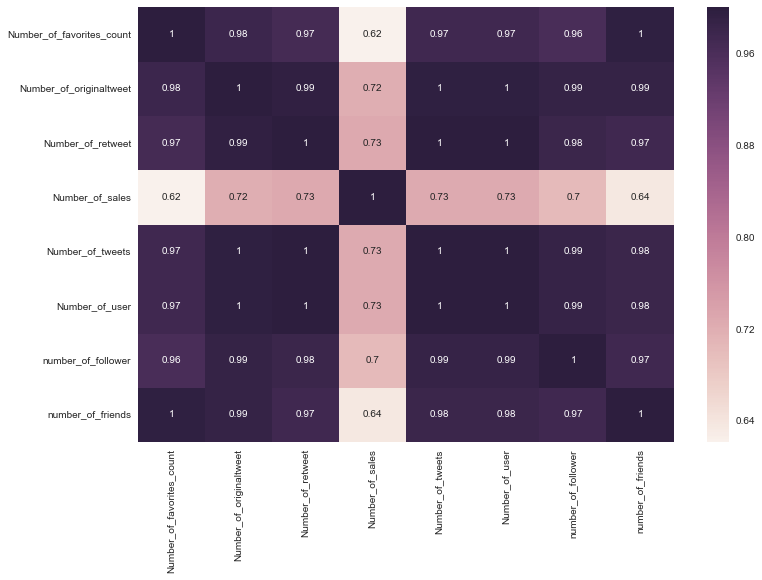

In [41]:
# correlation heatmap
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

- number_of_favorite_count, number_of_riginaltweets,number_of_retweets, number_of_tweets, number_of_users, number_of_followers and number_of_frineds
-have strong relationship with number_of_sales, especially number_of_retweet, number_of_tweet.
- Number_ of_friends  and number_of_favorite_count,have the least imfluence on sales, but the correlation is still 64% and 62%, which is more than 50%

In [42]:
# Regresion model

In [43]:
# Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn import linear_model
from sklearn.linear_model import Lasso
y = df['Number_of_sales'] 
X = df.drop(['Number_of_sales'], axis =1)
model1 = linear_model.Lasso(alpha = 1)        #higher alpha (penality parameter), fewer predictors
model1.fit(X, y)
model1_y = model1.predict(X)
print 'Coefficients: ', model1.coef_
print "y-intercept ", model1.intercept_
print "mean square error: ", mean_squared_error(y, model1_y)
print "variance or r-squared: ", explained_variance_score(y, model1_y)

Coefficients:  [  4.85264755e-02   7.08168629e+03  -9.20389070e+02   2.03021644e+02
   5.37941041e-13  -3.88202744e-02  -1.48399178e+00]
y-intercept  399465.941482
mean square error:  561612971739.0
variance or r-squared:  0.798996126147


- Model1 has 0.7989 variance scores, and mean square error is 0.561612971739e+12

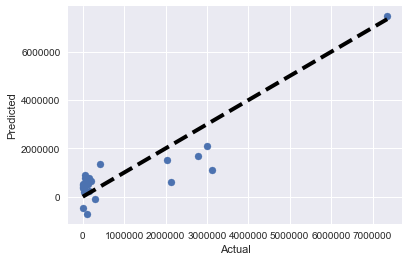

In [44]:
#visualize actural vs. predictive using scatter plot
plt.subplots()
plt.scatter(y, model1_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [107]:
# Print out the variables and its coef_
pd.DataFrame(zip(X.columns, np.transpose(model1.coef_)))

,0,1
0,Number_of_favorites_count,4.852648e-02
1,Number_of_originaltweet,7.081686e+03
2,Number_of_retweet,-9.203891e+02
3,Number_of_tweets,2.030216e+02
4,Number_of_user,5.379410e-13
5,number_of_follower,-3.882027e-02
6,number_of_friends,-1.483992e+00


In [46]:
# Select two vanuables
#selec only 2 X variables, which are best fit
X_new = SelectKBest(f_regression, k=2).fit_transform(X, y)
model2 = lm.LinearRegression()
model2.fit(X_new, y)
model2_y = model2.predict(X_new)

print "mean square error: ", mean_squared_error(y, model2_y)
print "variance or r-squared: ", explained_variance_score(y, model2_y)
print 'Coefficients: ', model2.coef_
print "y-intercept ", model2.intercept_


mean square error:  1.30639405032e+12
variance or r-squared:  0.532435541722
Coefficients:  [ 703.57170159 -208.74438897]
y-intercept  439017.942609


 - Model2 has 0.5324 variance, which is low, and 1.30639405032e+12 mean square error

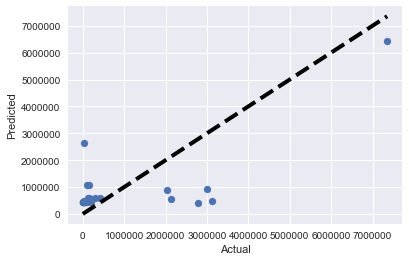

In [47]:
#visualize actural vs. predictive using scatter plot
plt.subplots()
plt.scatter(y, model2_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [85]:
# Ridge
from sklearn import linear_model
from sklearn.linear_model import Ridge
import numpy as np
#assigning columns to X and Y variables
y = df['Number_of_sales'] 
X = df.drop(['Number_of_sales'], axis =1)
model3 = linear_model.Ridge (alpha = .1)
model3.fit (X,y) 
model3_y = model3.predict(X)
Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
print model3.coef_
print model3.intercept_ 
print "mean square error: ", mean_squared_error(y, model3_y)
print "variance or r-squared: ", explained_variance_score(y, model3_y)


[  6.17170130e-02   5.04857905e+03  -3.65514587e+03   1.39343284e+03
   1.39343302e+03  -3.78001482e-02  -1.68144869e+00]
384410.423123
mean square error:  558643028526.0
variance or r-squared:  0.800059082526


- Model3 has 0.80005 variance score, and mean square error:  0.558643028526e+12

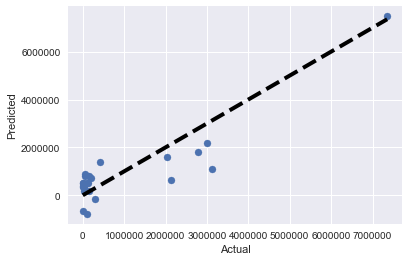

In [64]:
plt.subplots()
plt.scatter(y, model3_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [66]:
# Print out the variables and coef_ in model3
pd.DataFrame(zip(X.columns, np.transpose(model3.coef_)))

,0,1
0,Number_of_favorites_count,0.061717
1,Number_of_originaltweet,5048.579052
2,Number_of_retweet,-3655.145870
3,Number_of_tweets,1393.432842
4,Number_of_user,1393.433017
5,number_of_follower,-0.037800
6,number_of_friends,-1.681449


In [33]:
import statsmodels.formula.api as sm
runs_reg_model3 = sm.ols("Number_of_sales~Number_of_favorites_count+Number_of_originaltweet+Number_of_retweet+Number_of_tweets+Number_of_user+number_of_follower+number_of_friends",df)
runs_reg3 = runs_reg_model3.fit()
print runs_reg3.summary()

                            OLS Regression Results                            
Dep. Variable:        Number_of_sales   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     15.21
Date:                Sun, 29 Oct 2017   Prob (F-statistic):           4.49e-06
Time:                        13:56:05   Log-Likelihood:                -373.58
No. Observations:                  25   AIC:                             759.2
Df Residuals:                      19   BIC:                             766.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [37]:
# Randon Forest
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier()
#higher alpha (penality parameter), fewer predictors
model4.fit(X, y)
model4_y = model1.predict(X)
print "mean square error: ", mean_squared_error(y, model4_y)
print "variance or r-squared: ", explained_variance_score(y, model4_y)


mean square error:  561612971739.0
variance or r-squared:  0.798996126147


/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


- Model4 has 0.79899 variance score, and mean square error:  0.561612971739e+12

# Best Model

- The smaller the means squared error, the closer you are to finding the line of best fit. Depending on my data,  the sales of movies are large numbers, so it may be impossible to get a very small value for the mean squared error. 
- R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression. 0% indicates that the model explains none of the variability of the response data around its mean.
- Correlation is used to give information about the relationship between x and y.  When the regression equation is calculated, the corelation results indicate the nature and the strength of the relationship. 
  - in correlation coef_ sheet, all the variables has high positive relationship with y, but in my modle3, Number_of_retweet, Number_of_followers, and number_of_friends has negative coef_, which mean negative relationship.
  
** Model3 has the highest R-squared with 80% and lower mean square error than the other three models**

** The regresion of sales and the other variables is:**
    - Number of sales = 0.0617 f_count+5048.5814number_of_originaltweet-3655.1479Number_of_retweet+1393.4335Number_of_tweet+1393.4335Number_of_user-0.0378number_of_follower-1.6814number_of_friends

-Even though the the cope of f_count, number_of_folower, number_of_friends is small, but the number of these three variabbles are large, so these three variables are also important in this modle

# Part 2, Modely Deployment : Predictive Analytics (Predicting Y value)

In [114]:
# We use model3 to predict y value. 
scoring = pd.read_csv("moviesales2.csv")
scoring.head()

,Movie,Number_of_favorites_count,Number_of_originaltweet,Number_of_retweet,Number_of_sales,Number_of_tweets,Number_of_user,number_of_follower,number_of_friends
0,American Assassin,3730314,88,126,1388305,148,148,221483,183704
1,American Made,790869,31,31,1695000,62,62,368011,233668
2,Annabelle: Creation,1001732,16,23,147702,39,39,151095,82591
3,Blade Runner 2049,4372079,235,238,3965000,473,473,1631039,873377
4,Despicable Me 3,3492605,40,349,145000,389,389,3024604,891441


- Total have 12 hashtags
- The number of movies is 12 in second round dataset, almost 50% of movies are not sold last week.

In [115]:
scoring['Number_of_originaltweet'] = scoring['Number_of_originaltweet']*3
scoring['Number_of_retweet'] = scoring['Number_of_retweet']*3
scoring['Number_of_tweets'] = scoring['Number_of_tweets']*3
scoring['Number_of_user'] = scoring['Number_of_user']*3
scoring.head()

,Movie,Number_of_favorites_count,Number_of_originaltweet,Number_of_retweet,Number_of_sales,Number_of_tweets,Number_of_user,number_of_follower,number_of_friends
0,American Assassin,3730314,264,378,1388305,444,444,221483,183704
1,American Made,790869,93,93,1695000,186,186,368011,233668
2,Annabelle: Creation,1001732,48,69,147702,117,117,151095,82591
3,Blade Runner 2049,4372079,705,714,3965000,1419,1419,1631039,873377
4,Despicable Me 3,3492605,120,1047,145000,1167,1167,3024604,891441


- Because the collecting between Ubuntu server interupted automatively, I have only collect one day data on 24
- Trying to be more correct, I use Number_of_riginaltweet, Number_of_retweet, number_of_tweet and number of user times 3 ,to predict the three days data, the same days the same as the first round

In [116]:
# The number of movies
len(scoring)
# The number of tweets
print scoring['Number_of_tweets'].sum()
# The number of users
print scoring['Number_of_user'].sum()
# The number of original tweet
print scoring['Number_of_originaltweet'].sum()
# the number of retweet
print scoring['Number_of_retweet'].sum()


3933
3933
1437
2694


- the rate of original tweets and retweets is 1437/2694, 53% which is lower than the first round.

**The number of tweets**

-Since the discollecting of my Ubuntu server, I only collect data on Oct 24th, , so my dataset has only 6747 data.

-if use this number times 4 days, the same days of my first round, the dataset should be close. because many of my movies in my dataset
-have been released by more than 2months, so the number of tweets should be stable everyday.

-but for those which just released for one or two weeks, the number of tweets should increase, which is small number in my dataset.

-for those already released more than three weeks the tweets will declined

In [117]:
# the number of twets per movie
print float(3933/12)
# the number of users per movie
print float(3933/12)


327.0
327.0


- each movie has 327 tweets by 327 user on Oct 24, which means each user post one tweet in average

In [118]:
df.sort_values('Number_of_tweets', ascending=False).head()

,Movie,Number_of_favorites_count,Number_of_originaltweet,Number_of_retweet,Number_of_sales,Number_of_tweets,Number_of_user,number_of_follower,number_of_friends
5,Blade Runner 2049,289679937,7392,15256,7353151,22648,22648,172673430,29099976
24,Wonder Woman,201217228,3478,5923,23385,9401,9401,76171249,18938561
18,Spider-Man: Homecoming,37714073,621,1583,160679,2204,2204,16692121,3201811
14,Kingsman: The Golden Circle,20674851,501,1166,3011307,1667,1667,4476608,1312311
8,Dunkirk,31511539,151,1328,100121,1479,1479,3574369,1785272


In [119]:
scoring.sort_values('Number_of_user', ascending=False).head()

,Movie,Number_of_favorites_count,Number_of_originaltweet,Number_of_retweet,Number_of_sales,Number_of_tweets,Number_of_user,number_of_follower,number_of_friends
3,Blade Runner 2049,4372079,705,714,3965000,1419,1419,1631039,873377
4,Despicable Me 3,3492605,120,1047,145000,1167,1167,3024604,891441
0,American Assassin,3730314,264,378,1388305,444,444,221483,183704
9,My Little Pony: The Movie,1387801,54,243,8885899,297,297,56865,56435
1,American Made,790869,93,93,1695000,186,186,368011,233668


In [120]:
scoring.sort_values('Number_of_sales', ascending=False).head()

,Movie,Number_of_favorites_count,Number_of_originaltweet,Number_of_retweet,Number_of_sales,Number_of_tweets,Number_of_user,number_of_follower,number_of_friends
9,My Little Pony: The Movie,1387801,54,243,8885899,297,297,56865,56435
5,Flatliners,65530,21,18,3975021,39,39,5674,13167
3,Blade Runner 2049,4372079,705,714,3965000,1419,1419,1631039,873377
1,American Made,790869,93,93,1695000,186,186,368011,233668
11,Victoria and Abdul,344528,33,39,1612000,72,72,559902,22761


In [101]:
# collect the columns that I use as variables, and get the result of sales of each movies
columns = scoring[['Number_of_favorites_count', 'Number_of_originaltweet', 'Number_of_retweet', 'Number_of_tweets', 'Number_of_user', 'number_of_follower', 'number_of_friends']]
sales = model3.predict(columns)

sales

array([ 1485921.4913085 ,   674355.2071435 ,   617840.42231509,
        4028086.68038642,  -982114.99681595,   515015.92888214,
         407153.460197  ,   378734.05104384,   837262.94173247,
         585141.27523025,   526267.5041931 ,   570944.59142781])

In [95]:
scoring['Number_of_sales']

0     1388305
1     1695000
2      147702
3     3965000
4      145000
5     3975021
6        5122
7      168367
8     1600000
9     8885899
10    1300000
11    1612000
Name: Number_of_sales, dtype: int64

# References

**https://stackoverflow.com/questions/148042/using-or-comparisons-with-if-statements**
    
**https://stackoverflow.com/questions/148042/using-or-comparisons-with-if-statements**
    
**https://stackoverflow.com/questions/38905031/name-classification-model-is-not-defined**
    
**https://stackoverflow.com/questions/20107570/removing-index-column-in-pandas**
